In [1]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

if os.getenv("DATA_FOLDER") == "":
    os.environ["DATA_FOLDER"] = "data"

## Setup

In [2]:
bank = pd.read_csv(os.path.join(os.getenv("DATA_FOLDER"), "bank.csv"))
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
kidney = pd.read_csv(os.path.join(os.getenv("DATA_FOLDER"), "kidney.csv"))
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Preprocessing

In [4]:
from preprocessing import int_encoding

to_encode = [column for column in kidney.columns if str(kidney[column].dtype)=="object"]
print(to_encode)

encoded = int_encoding(kidney, to_encode)

encoded

['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,1.0,0.0,0.0,0.0,423.0,...,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,1.0,0.0,117.0,...,3.0,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,1.0,0.0,0.0,0.0,106.0,...,4.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,0.0,0.0,0.0,140.0,...,38.0,3.0,17.0,1.0,1.0,0.0,0.0,0.0,0.0,1
396,42.0,70.0,1.025,0.0,0.0,1.0,0.0,0.0,0.0,75.0,...,NaN,0.0,40.0,1.0,1.0,0.0,0.0,0.0,0.0,1
397,12.0,80.0,1.020,0.0,0.0,1.0,0.0,0.0,0.0,100.0,...,40.0,NaN,38.0,1.0,1.0,0.0,0.0,0.0,0.0,1
398,17.0,60.0,1.025,0.0,0.0,1.0,0.0,0.0,0.0,114.0,...,43.0,30.0,48.0,1.0,1.0,0.0,0.0,0.0,0.0,1


In [5]:
to_fill = [column for column in encoded.columns if np.sum(encoded.isna()[column])]
print(to_fill)

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [6]:
def fill_na(df,columns,strategy="most"):
    temp = df.copy()
    for column in columns:
        if strategy=="most":
            most = temp[column].value_counts().index[0]
            temp[column] = temp[column].fillna(most)
        else:
            raise NotImplementedError(f"{strategy} not a valid strategy)")
    
    return temp

In [7]:
filled = fill_na(encoded, to_fill)

print(np.sum(filled.isna(), axis = 0))

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


In [8]:
def train_test_split(df, train_split=0.7):
    assert 0<=train_split<=1

    indices = np.array(kidney.index)

    np.random.shuffle(indices)

    train_indices = indices[:int(train_split*len(indices))]
    test_indices = indices[int(train_split*len(indices)):]

    train_df = df.iloc[train_indices]
    test_df = df.iloc[test_indices]
    return train_df, test_df

train, test = train_test_split(filled)

test


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
13,68.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,98.0,...,10.0,5.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0
298,34.0,60.0,1.020,0.0,0.0,1.0,0.0,0.0,0.0,91.0,...,19.0,24.0,17.0,1.0,1.0,0.0,0.0,0.0,0.0,1
217,63.0,100.0,1.010,1.0,0.0,0.0,0.0,0.0,0.0,78.0,...,6.0,60.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0
87,70.0,100.0,1.005,1.0,0.0,1.0,1.0,1.0,0.0,169.0,...,3.0,39.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0
343,37.0,60.0,1.025,0.0,0.0,1.0,0.0,0.0,0.0,111.0,...,41.0,38.0,47.0,1.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,73.0,90.0,1.010,1.0,4.0,1.0,1.0,1.0,0.0,234.0,...,9.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
83,48.0,70.0,1.015,1.0,0.0,1.0,0.0,0.0,0.0,127.0,...,10.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
272,56.0,80.0,1.025,0.0,0.0,1.0,0.0,0.0,0.0,139.0,...,25.0,42.0,44.0,1.0,1.0,0.0,0.0,0.0,0.0,1
219,68.0,90.0,1.010,0.0,0.0,0.0,0.0,0.0,0.0,238.0,...,9.0,78.0,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp = filled.copy()

scaler = StandardScaler()

pd.DataFrame(scaler.fit_transform(filled))

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.216167,0.254214,0.421486,0.076249,-0.380269,-1.277333,-0.484322,-0.342518,-0.241249,-0.283841,...,-1.446105,-1.101994,-0.955519,-1.311903,-1.231107,-0.306651,-0.507801,-0.484322,-0.420084,-0.774597
1,-2.627830,-1.972476,0.421486,2.363728,-0.380269,-1.277333,-0.484322,-0.342518,-0.241249,-0.572370,...,-1.359186,-1.061546,-0.893148,0.762252,0.533921,-0.306651,-0.507801,-0.484322,-0.420084,-0.774597
2,0.607327,0.254214,-1.421074,0.838742,2.507853,0.782881,-0.484322,-0.342518,-0.241249,3.676881,...,-1.272268,-1.021099,-0.893148,0.762252,-1.231107,-0.306651,1.969276,-0.484322,2.380476,-0.774597
3,-0.216167,-0.488016,-2.342354,2.363728,-0.380269,0.782881,2.064742,2.919556,-0.241249,-0.336301,...,-1.185349,-0.980651,-0.830778,-1.311903,0.533921,-0.306651,1.969276,2.064742,2.380476,-0.774597
4,-0.039704,0.254214,-1.421074,0.838742,-0.380269,0.782881,-0.484322,-0.342518,-0.241249,-0.480565,...,-1.098431,-0.940204,-0.768407,0.762252,0.533921,-0.306651,-0.507801,-0.484322,-0.420084,-0.774597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.195580,0.254214,0.421486,-0.686244,-0.380269,0.782881,-0.484322,-0.342518,-0.241249,-0.034656,...,1.856794,-0.980651,0.104783,0.762252,0.533921,-0.306651,-0.507801,-0.484322,-0.420084,1.290994
396,-0.569094,-0.488016,1.342766,-0.686244,-0.380269,0.782881,-0.484322,-0.342518,-0.241249,-0.887129,...,-0.576921,-1.101994,1.539309,0.762252,0.533921,-0.306651,-0.507801,-0.484322,-0.420084,1.290994
397,-2.333725,0.254214,0.421486,-0.686244,-0.380269,0.782881,-0.484322,-0.342518,-0.241249,-0.559255,...,2.030631,-0.899756,1.414567,0.762252,0.533921,-0.306651,-0.507801,-0.484322,-0.420084,1.290994
398,-2.039620,-1.230246,1.342766,-0.686244,-0.380269,0.782881,-0.484322,-0.342518,-0.241249,-0.375646,...,2.291386,0.111433,2.038274,0.762252,0.533921,-0.306651,-0.507801,-0.484322,-0.420084,1.290994


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def normalize(df, scaler):
    temp = df.copy()
    temp = temp.drop(columns=["class"])
    
    col = temp.columns

    temp = pd.DataFrame(scaler.fit_transform(temp))

    temp.columns = col
    temp["class"] = df["class"]

    return temp, scaler

In [11]:
temp, scaler = normalize(filled, scaler)

np.std(temp, axis=0)


age      1.000000
bp       1.000000
sg       1.000000
al       1.000000
su       1.000000
rbc      1.000000
pc       1.000000
pcc      1.000000
ba       1.000000
bgr      1.000000
bu       1.000000
sc       1.000000
sod      1.000000
pot      1.000000
hemo     1.000000
pcv      1.000000
wc       1.000000
rc       1.000000
htn      1.000000
dm       1.000000
cad      1.000000
appet    1.000000
pe       1.000000
ane      1.000000
class    0.484123
dtype: float64

## Viz

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

sns.set_style("whitegrid")

In [13]:
tsne1 = TSNE(n_components=2, perplexity=300)

transformed_bank = tsne1.fit_transform(bank.drop(columns=["class"]))

In [14]:
tsne2 = TSNE(n_components=2, perplexity=100, early_exaggeration=100)

transformed_kidney = tsne2.fit_transform(filled.drop(columns=["class"]))

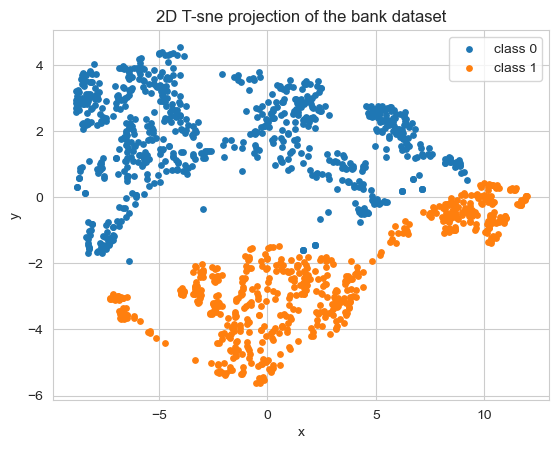

In [15]:
for class_index in bank["class"].value_counts().index:
    indexes = np.where(bank["class"]==class_index)
    plt.scatter(transformed_bank[:,0][indexes], transformed_bank[:,1][indexes],label=f"class {class_index}", s=15)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D T-sne projection of the bank dataset")
plt.show()

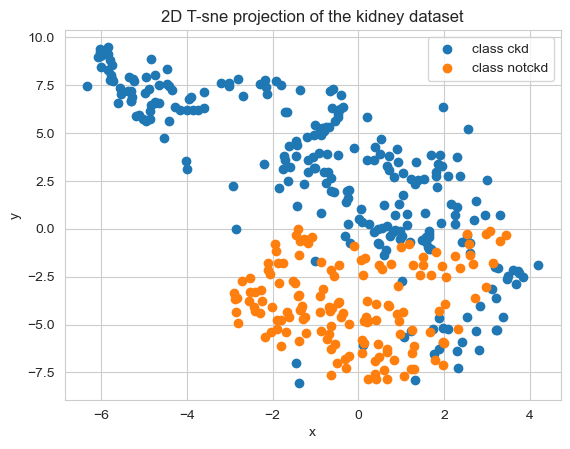

In [55]:
for class_index in kidney["class"].value_counts().index:
    indexes = np.where(kidney["class"]==class_index)
    plt.scatter(transformed_kidney[:,0][indexes], transformed_kidney[:,1][indexes],label=f"class {class_index}")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D T-sne projection of the kidney dataset")
plt.show()

## Model

We have binary classifiation problems. We are going to implement several models:
- k-NN
- SVM (linear and rbf kernels)
- Decision Tree
- Random forests
- xGBoost
- MLP
- Bayesian models

In [56]:
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC # SVM classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from model import TorchMLP
# we could do
# from sklearn.neural_network import MLPClassifier
# but, we'll use torch

In [63]:
knn = NearestNeighbors()
svm_linear = SVC(kernel="linear")
svm_rbf = SVC(kernel="rbf")
tree = DecisionTreeClassifier()
xgboost = GradientBoostingClassifier()
random_forest = RandomForestClassifier()
gaussian_bayes = GaussianNB()


In [64]:
config = dict(
    n_epochs = 500,
    bs = 16,
    architecture = [8, 8]
)

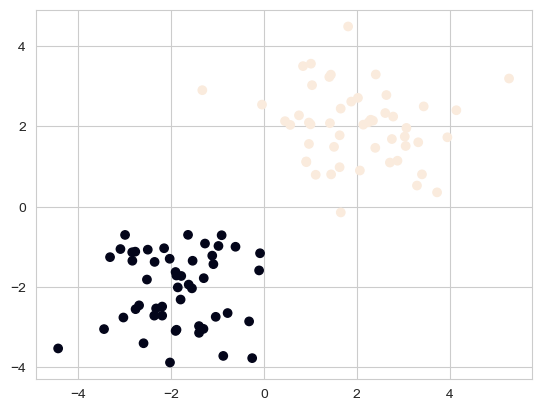

In [65]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, n_samples=100, centers = np.array([[-2,-2], [2,2]]))

plt.scatter(X[:,0], X[:,1], c=y)

plt.show()

In [68]:
config = dict(
    n_epochs=100,
    bs=64,
    opt="adam",
    lr=1e-3,
    architecture=[16, 32, 16],
    p=0.05
)

model = TorchMLP(config)
classes = np.array(bank["class"])
model.fit(transformed_bank, classes)